In [2]:
import sys 
import os
import pandas as pd
import nltk.corpus
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tatha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tatha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
file_path = "D:\\pg\\classes\\project\\code\\"
#file_path = '/content/' 
sys.path.append(os.path.abspath(file_path)) 


data_to_keep=30000

df_plot_summaries = pd.read_excel(file_path+'encoder_decoder_input.xlsx')
df_plot_summaries.drop(df_plot_summaries.index[data_to_keep:len(df_plot_summaries.index)], axis=0, inplace=True)


#symbols to remove
var_symbols = ["~", "!", "@", "#", "$", "%", "^", "&", "*", "(", 
                ")", "_", "+", "`", "-", "=", "[", "]", "\\", "{", 
                "}", "|", ";", "'", ":", '"', ",", ".", "/", "<", ">", "?", "  "]

contraction_mapping = {"ain't": "is not", "aren't": "are not", "can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                       "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                       "he'd": "he would", "he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                       "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have", "I'm": "I am", "I've": "I have", "i'd": "i would",
                       "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have", "i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                       "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have", "it's": "it is", "let's": "let us", "ma'am": "madam",
                       "mayn't": "may not", "might've": "might have", "mightn't": "might not", "mightn't've": "might not have", "must've": "must have",
                       "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have", "o'clock": "of the clock",
                       "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                       "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                       "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have", "so's": "so as",
                       "this's": "this is", "that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                       "there'd've": "there would have", "there's": "there is", "here's": "here is", "they'd": "they would", "they'd've": "they would have",
                       "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                       "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                       "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                       "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                       "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                       "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                       "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                       "y'all'd": "you all would", "y'all'd've": "you all would have", "y'all're": "you all are", "y'all've": "you all have",
                       "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                       "you're": "you are", "you've": "you have"}

stop_words = set(stopwords.words('english'))

#declare dataframes to store cleaned data
df_plot_sum_cleaned = pd.DataFrame()

for index, row in df_plot_summaries.iterrows():
    var_title=row.loc['Title']
    var_summary=row.loc['Summary']
    var_plot=row.loc['Plot']

    var_tmp_summary=var_summary
    var_tmp_plot=var_plot
    for iter2 in var_symbols:
        var_tmp_summary = str(var_tmp_summary).replace(iter2, ' ').lower()
        var_tmp_plot = str(var_tmp_plot).replace(iter2, ' ').lower()
    
    var_tmp_plot = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in var_tmp_plot.split(" ")])
    var_tmp_summary = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in var_tmp_summary.split(" ")])

    plot_tokens = word_tokenize(var_tmp_plot)
    var_plot_cleaned = ''
    for w in plot_tokens:
        if w not in stop_words:
            var_plot_cleaned+=w+' '

    summary_tokens = word_tokenize(var_tmp_summary)
    var_summary_cleaned = ''
    for w in summary_tokens:
        if w not in stop_words:
            var_summary_cleaned+=w+' '
    
    new_row = {'Title':var_title, 'Summary':var_summary, 'Plot':var_plot, 'Cleaned_Plot':var_plot_cleaned, 'Cleaned_Summary':var_summary_cleaned}
    df_plot_sum_cleaned = pd.concat([df_plot_sum_cleaned, pd.DataFrame([new_row])], ignore_index=True)

real_summaries = df_plot_sum_cleaned['Cleaned_Summary']
df_plot_sum_cleaned['Cleaned_Summary'] = df_plot_sum_cleaned['Cleaned_Summary'].apply(lambda x : '_START_ '+ x + ' _END_')

In [27]:
df_plot_summaries.head()

Year     Title                                               Plot  \
0  1975  end play  End Play is a 1975 movie about a couple of str...   
1  1976  end play  End Play is a 1976 drama about a group of youn...   
2  1977  raw deal  Raw Deal is a 1977 American action crime thril...   
3  1978  blue fin  Blue Fin is a 1978 Australian sports drama fil...   
4  1979  dimboola  Dimboola is a 1979 Australian comedy-drama fil...   

                                             Summary  
0         Struggling artists battle for inheritance.  
1  Young people confront fears, learn life's comp...  
2                FBI agent infiltrates mob, betrays.  
3     Boy catches legendary blue fin despite father.  
4  Friends attend rural Jewish wedding, disruptio...

In [29]:
df_plot_sum_cleaned.to_csv(file_path+'df_plot_sum_cleaned.csv')

In [4]:
from statistics import mode
from matplotlib import pyplot
pyplot.rcParams['figure.figsize'] = [20, 10]

plot_word_count = []
summary_word_count = []

# populate the lists with sentence lengths
for i in df_plot_sum_cleaned['Cleaned_Plot']:
      plot_word_count.append(len(i.split()))

for i in df_plot_sum_cleaned['Cleaned_Summary']:
      summary_word_count.append(len(i.split()))

max_len_text=mode(plot_word_count) 
max_len_summary=mode(summary_word_count)

In [8]:
max_len_text

28

In [9]:
max_len_summary

7

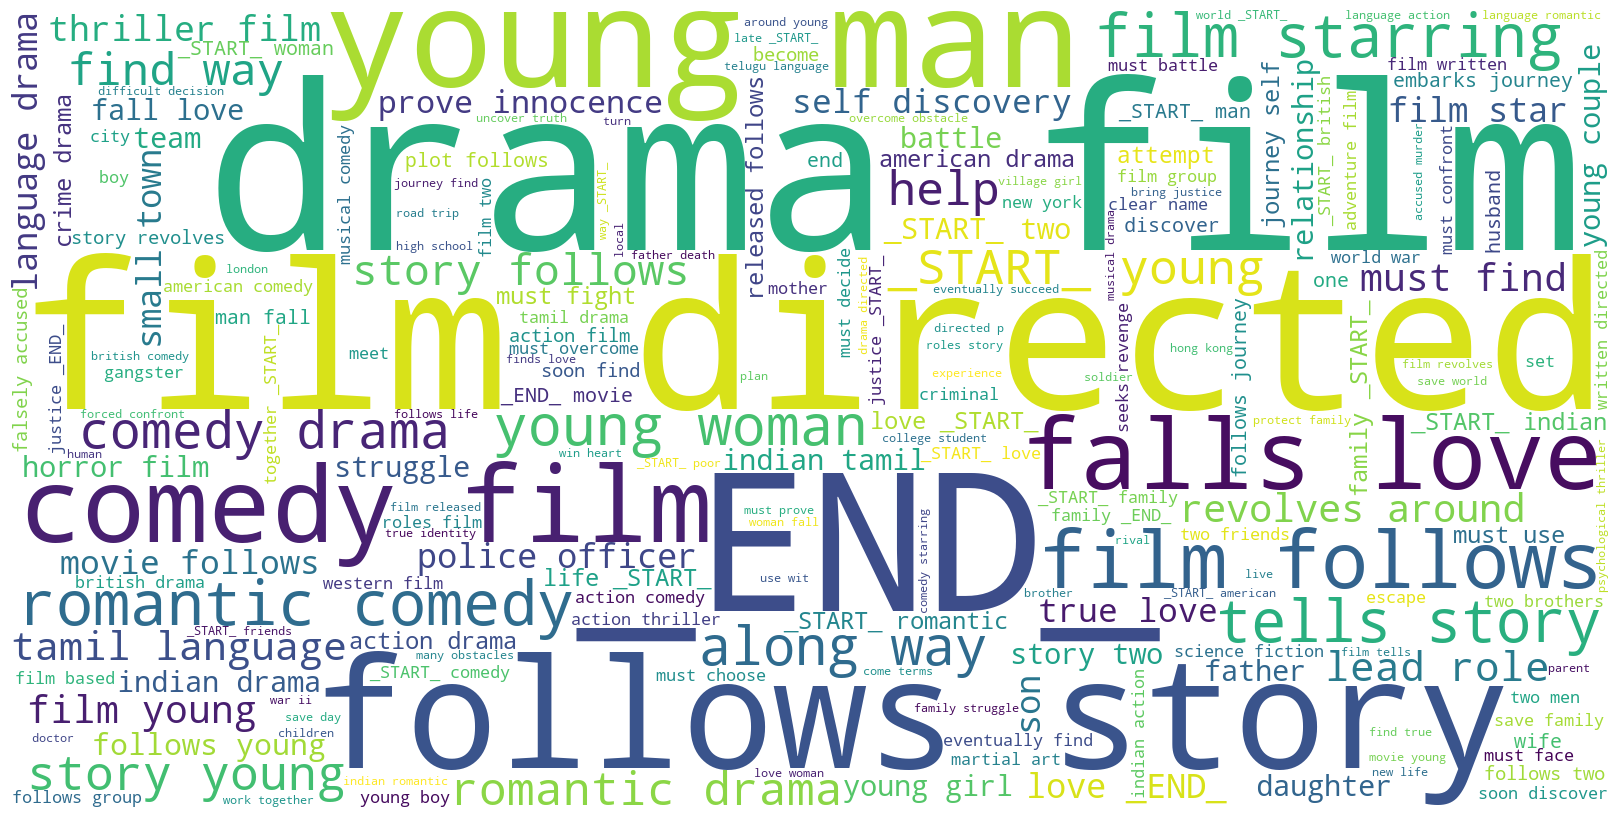

In [5]:
from wordcloud import WordCloud, STOPWORDS

text_data = df_plot_sum_cleaned['Cleaned_Plot'] + " " + df_plot_sum_cleaned['Cleaned_Summary']
text = " ".join(text_data)

# Define stopwords
stopwords = set(STOPWORDS)

# Generate the word cloud
wordcloud = WordCloud(width = 1600, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(text)

# Plot the WordCloud image                        
pyplot.figure(figsize = (16, 8), facecolor = None) 
pyplot.imshow(wordcloud) 
pyplot.axis("off") 
pyplot.tight_layout(pad = 0)

pyplot.show()


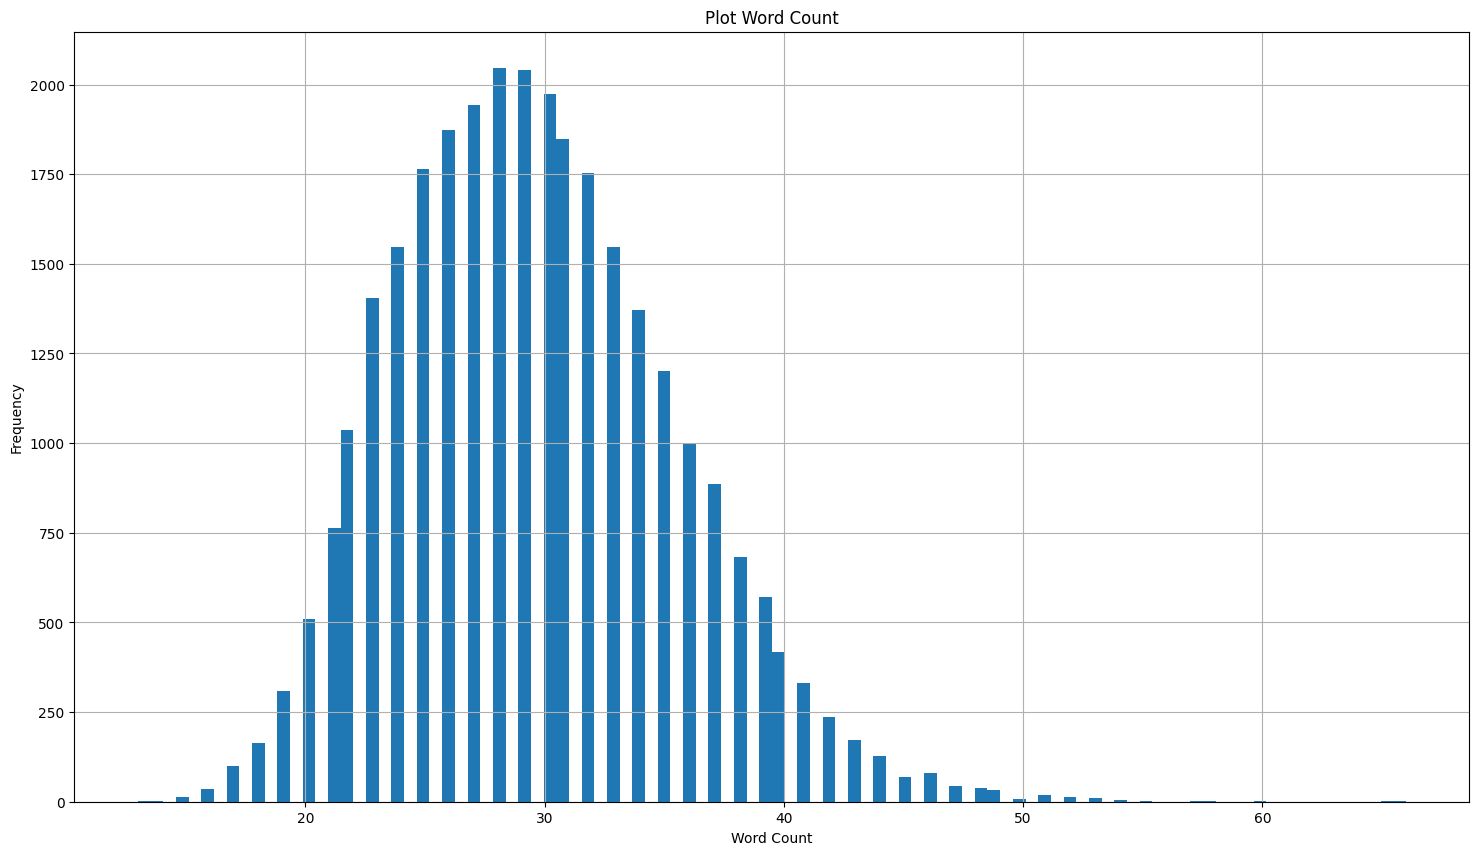

In [6]:
df = pd.DataFrame()
df['Word Count'] = df_plot_sum_cleaned['Cleaned_Plot'].apply(lambda x: len(str(x).split()))
pyplot.figure(figsize=(18,10))
pyplot.hist(df, bins=100)
pyplot.title('Plot Word Count')
pyplot.xlabel('Word Count')
pyplot.ylabel('Frequency')
pyplot.grid()
pyplot.show()


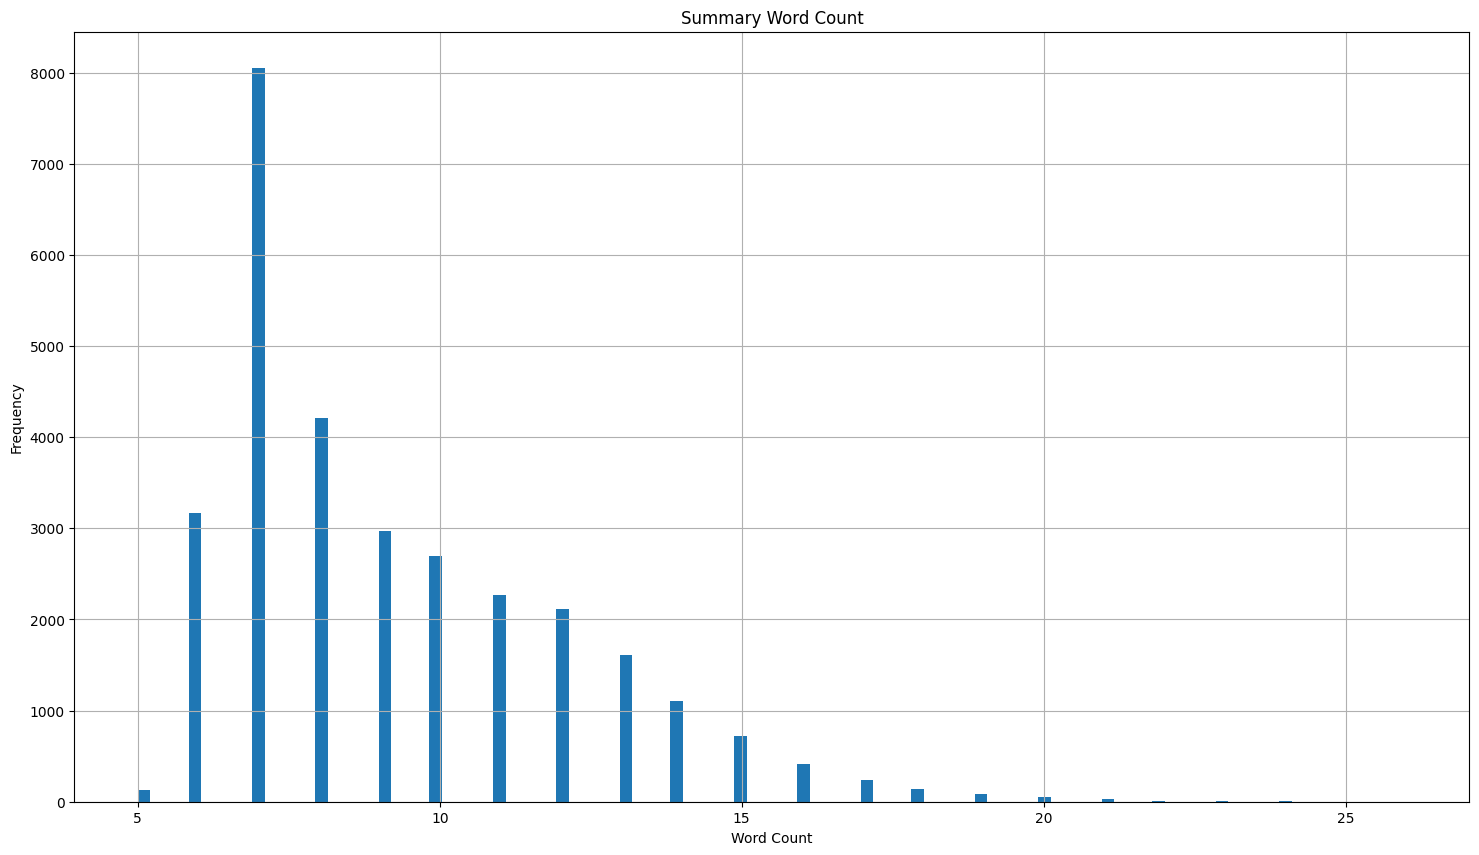

In [7]:
df = pd.DataFrame()
df['Word Count'] = df_plot_sum_cleaned['Cleaned_Summary'].apply(lambda x: len(str(x).split()))
pyplot.figure(figsize=(18,10))
pyplot.hist(df, bins=100)
pyplot.title('Summary Word Count')
pyplot.xlabel('Word Count')
pyplot.ylabel('Frequency')
pyplot.grid()
pyplot.show()

In [11]:
from sklearn.model_selection import train_test_split

data_test_size = 0.3

x_tr,x_val,y_tr,y_val=train_test_split(df_plot_sum_cleaned['Cleaned_Plot'],df_plot_sum_cleaned['Cleaned_Summary'],
                                        test_size=data_test_size,random_state=0,shuffle=True)

In [12]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer()
x_tokenizer.fit_on_texts(list(x_tr))

#convert text sequences into integer sequences
x_tr    =   x_tokenizer.texts_to_sequences(x_tr) 
x_val   =   x_tokenizer.texts_to_sequences(x_val)

#padding zero upto maximum length
x_tr    =   pad_sequences(x_tr,  maxlen=max_len_text, padding='post') 
x_val   =   pad_sequences(x_val, maxlen=max_len_text, padding='post')

x_voc_size   =  len(x_tokenizer.word_index) +1

In [13]:
x_voc_size

29315

In [14]:
embedding_dim = int(min(500, x_voc_size/2)/2)
latent_dim = embedding_dim*2

In [23]:
embedding_dim

250

In [24]:
latent_dim

500

In [15]:
#preparing a tokenizer for summary on testing data 
y_tokenizer = Tokenizer()
y_tokenizer.fit_on_texts(list(y_tr))

#convert summary sequences into integer sequences
y_tr    =   y_tokenizer.texts_to_sequences(y_tr) 
y_val   =   y_tokenizer.texts_to_sequences(y_val) 

#padding zero upto maximum length
y_tr    =   pad_sequences(y_tr, maxlen=max_len_summary, padding='post')
y_val   =   pad_sequences(y_val, maxlen=max_len_summary, padding='post')

y_voc_size  =   len(y_tokenizer.word_index) +1

In [17]:
y_voc_size

12877

In [16]:
thresh=4
cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in x_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
        
print("Training set")
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

Training set
% of rare words in vocabulary: 63.921675649860134
Total Coverage of rare words: 4.62535833405562


In [18]:
thresh=4
cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in y_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value

print("Testing set")
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

Testing set
% of rare words in vocabulary: 67.92482137309723
Total Coverage of rare words: 6.749481761084125


In [19]:
reverse_target_word_index=y_tokenizer.index_word
reverse_source_word_index=x_tokenizer.index_word
target_word_index=y_tokenizer.word_index

In [20]:
from keras import backend as K
from tensorflow.keras.layers import Input, LSTM, Embedding, Concatenate, TimeDistributed, Dense, Bidirectional
from tensorflow.keras.models import Model
from attention import AttentionLayer

K.clear_session()

# def encoder():
#     encoder_inputs = Input(shape=(max_len_text,)) 
#     enc_emb = Embedding(x_voc_size, embedding_dim,trainable=True)(encoder_inputs) 

#     #LSTM 1 
#     encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True) 
#     encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb) 

#     #LSTM 2 
#     encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True) 
#     encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1) 

#     #LSTM 3 
#     encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True) 
#     encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

#     return encoder_inputs, encoder_outputs, state_h, state_c

def encoder():
    encoder_inputs = Input(shape=(max_len_text,)) 

    # Using pre-trained embeddings
    enc_emb = Embedding(x_voc_size, embedding_dim,trainable=True)(encoder_inputs)

    # Bidirectional LSTM 1 with dropout
    encoder_lstm1 = Bidirectional(LSTM(latent_dim, return_sequences=True, return_state=True, dropout=0.3, recurrent_dropout=0.3)) 
    encoder_output1, forward_h1, forward_c1, backward_h1, backward_c1 = encoder_lstm1(enc_emb) 

    # Concatenate the states from both directions
    state_h1 = Concatenate()([forward_h1, backward_h1])
    state_c1 = Concatenate()([forward_c1, backward_c1])

    # # Bidirectional LSTM 2 with dropout
    # encoder_lstm2 = Bidirectional(LSTM(latent_dim, return_sequences=True, return_state=True, dropout=0.3, recurrent_dropout=0.3)) 
    # encoder_output2, forward_h2, forward_c2, backward_h2, backward_c2 = encoder_lstm2(encoder_output1) 

    # # Concatenate the states from both directions
    # state_h2 = Concatenate()([forward_h2, backward_h2])
    # state_c2 = Concatenate()([forward_c2, backward_c2])

    # # Bidirectional LSTM 3 with dropout
    # encoder_lstm3 = Bidirectional(LSTM(latent_dim, return_sequences=True, return_state=True, dropout=0.3, recurrent_dropout=0.3)) 
    # encoder_output3, forward_h3, forward_c3, backward_h3, backward_c3 = encoder_lstm3(encoder_output2) 

    # # Concatenate the states from both directions
    # state_h3 = Concatenate()([forward_h3, backward_h3])
    # state_c3 = Concatenate()([forward_c3, backward_c3])

    # return encoder_inputs, encoder_output3, state_h3, state_c3
    return encoder_inputs, encoder_output1, state_h1, state_c1

# # Set up the decoder. 
# def decoder(encoder_outputs, state_h, state_c):
#     decoder_inputs = Input(shape=(None,)) 
#     dec_emb_layer = Embedding(y_voc_size, embedding_dim,trainable=True) 
#     dec_emb = dec_emb_layer(decoder_inputs) 

#     #LSTM using encoder_states as initial state
#     decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True) 
#     decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c]) 

#     #Attention Layer
#     attn_layer = AttentionLayer(name='attention_layer') 
#     attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs]) 

#     # Concat attention output and decoder LSTM output 
#     decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

#     #Dense layer
#     decoder_dense = TimeDistributed(Dense(y_voc_size, activation='softmax')) 
#     decoder_outputs = decoder_dense(decoder_concat_input)

#     return decoder_inputs, decoder_outputs, dec_emb_layer, decoder_lstm, attn_layer, decoder_dense

def decoder(encoder_outputs, state_h, state_c):
    # Inputs
    decoder_inputs = Input(shape=(None,))

    # Embedding layer
    dec_emb_layer = Embedding(y_voc_size, embedding_dim, trainable=True) 
    dec_emb = dec_emb_layer(decoder_inputs) 

    # LSTM using encoder_states as initial state
    decoder_lstm = LSTM(latent_dim*2, return_sequences=True, return_state=True)  # Multiply by 2 because of bidirectionality in encoder
    decoder_outputs, decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb, initial_state=[state_h, state_c]) 

    # Attention Layer
    attn_layer = AttentionLayer(name='attention_layer') 
    attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs]) 

    # Concat attention output and decoder LSTM output 
    decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

    # Dense layer
    decoder_dense = TimeDistributed(Dense(y_voc_size, activation='softmax')) 
    decoder_outputs = decoder_dense(decoder_concat_input)

    return decoder_inputs, decoder_outputs, dec_emb_layer, decoder_lstm, attn_layer, decoder_dense

# Define the model
def lstm_model(encoder_inputs, decoder_inputs, decoder_outputs):
    model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
    return model

#bring everything together
encoder_inputs, encoder_outputs, state_h, state_c = encoder()
decoder_inputs, decoder_outputs, dec_emb_layer, decoder_lstm, attn_layer, decoder_dense = decoder(encoder_outputs, state_h, state_c)
model = lstm_model(encoder_inputs, decoder_inputs, decoder_outputs)


In [21]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

model_loss=SparseCategoricalCrossentropy()
model_optimizer=Adam(
    learning_rate=0.001, 
    epsilon=1e-07)

model.compile(optimizer=model_optimizer, loss=model_loss)
es = EarlyStopping(
    monitor='val_loss', 
    mode='auto', 
    verbose=1, 
    patience=3,
    restore_best_weights=True)

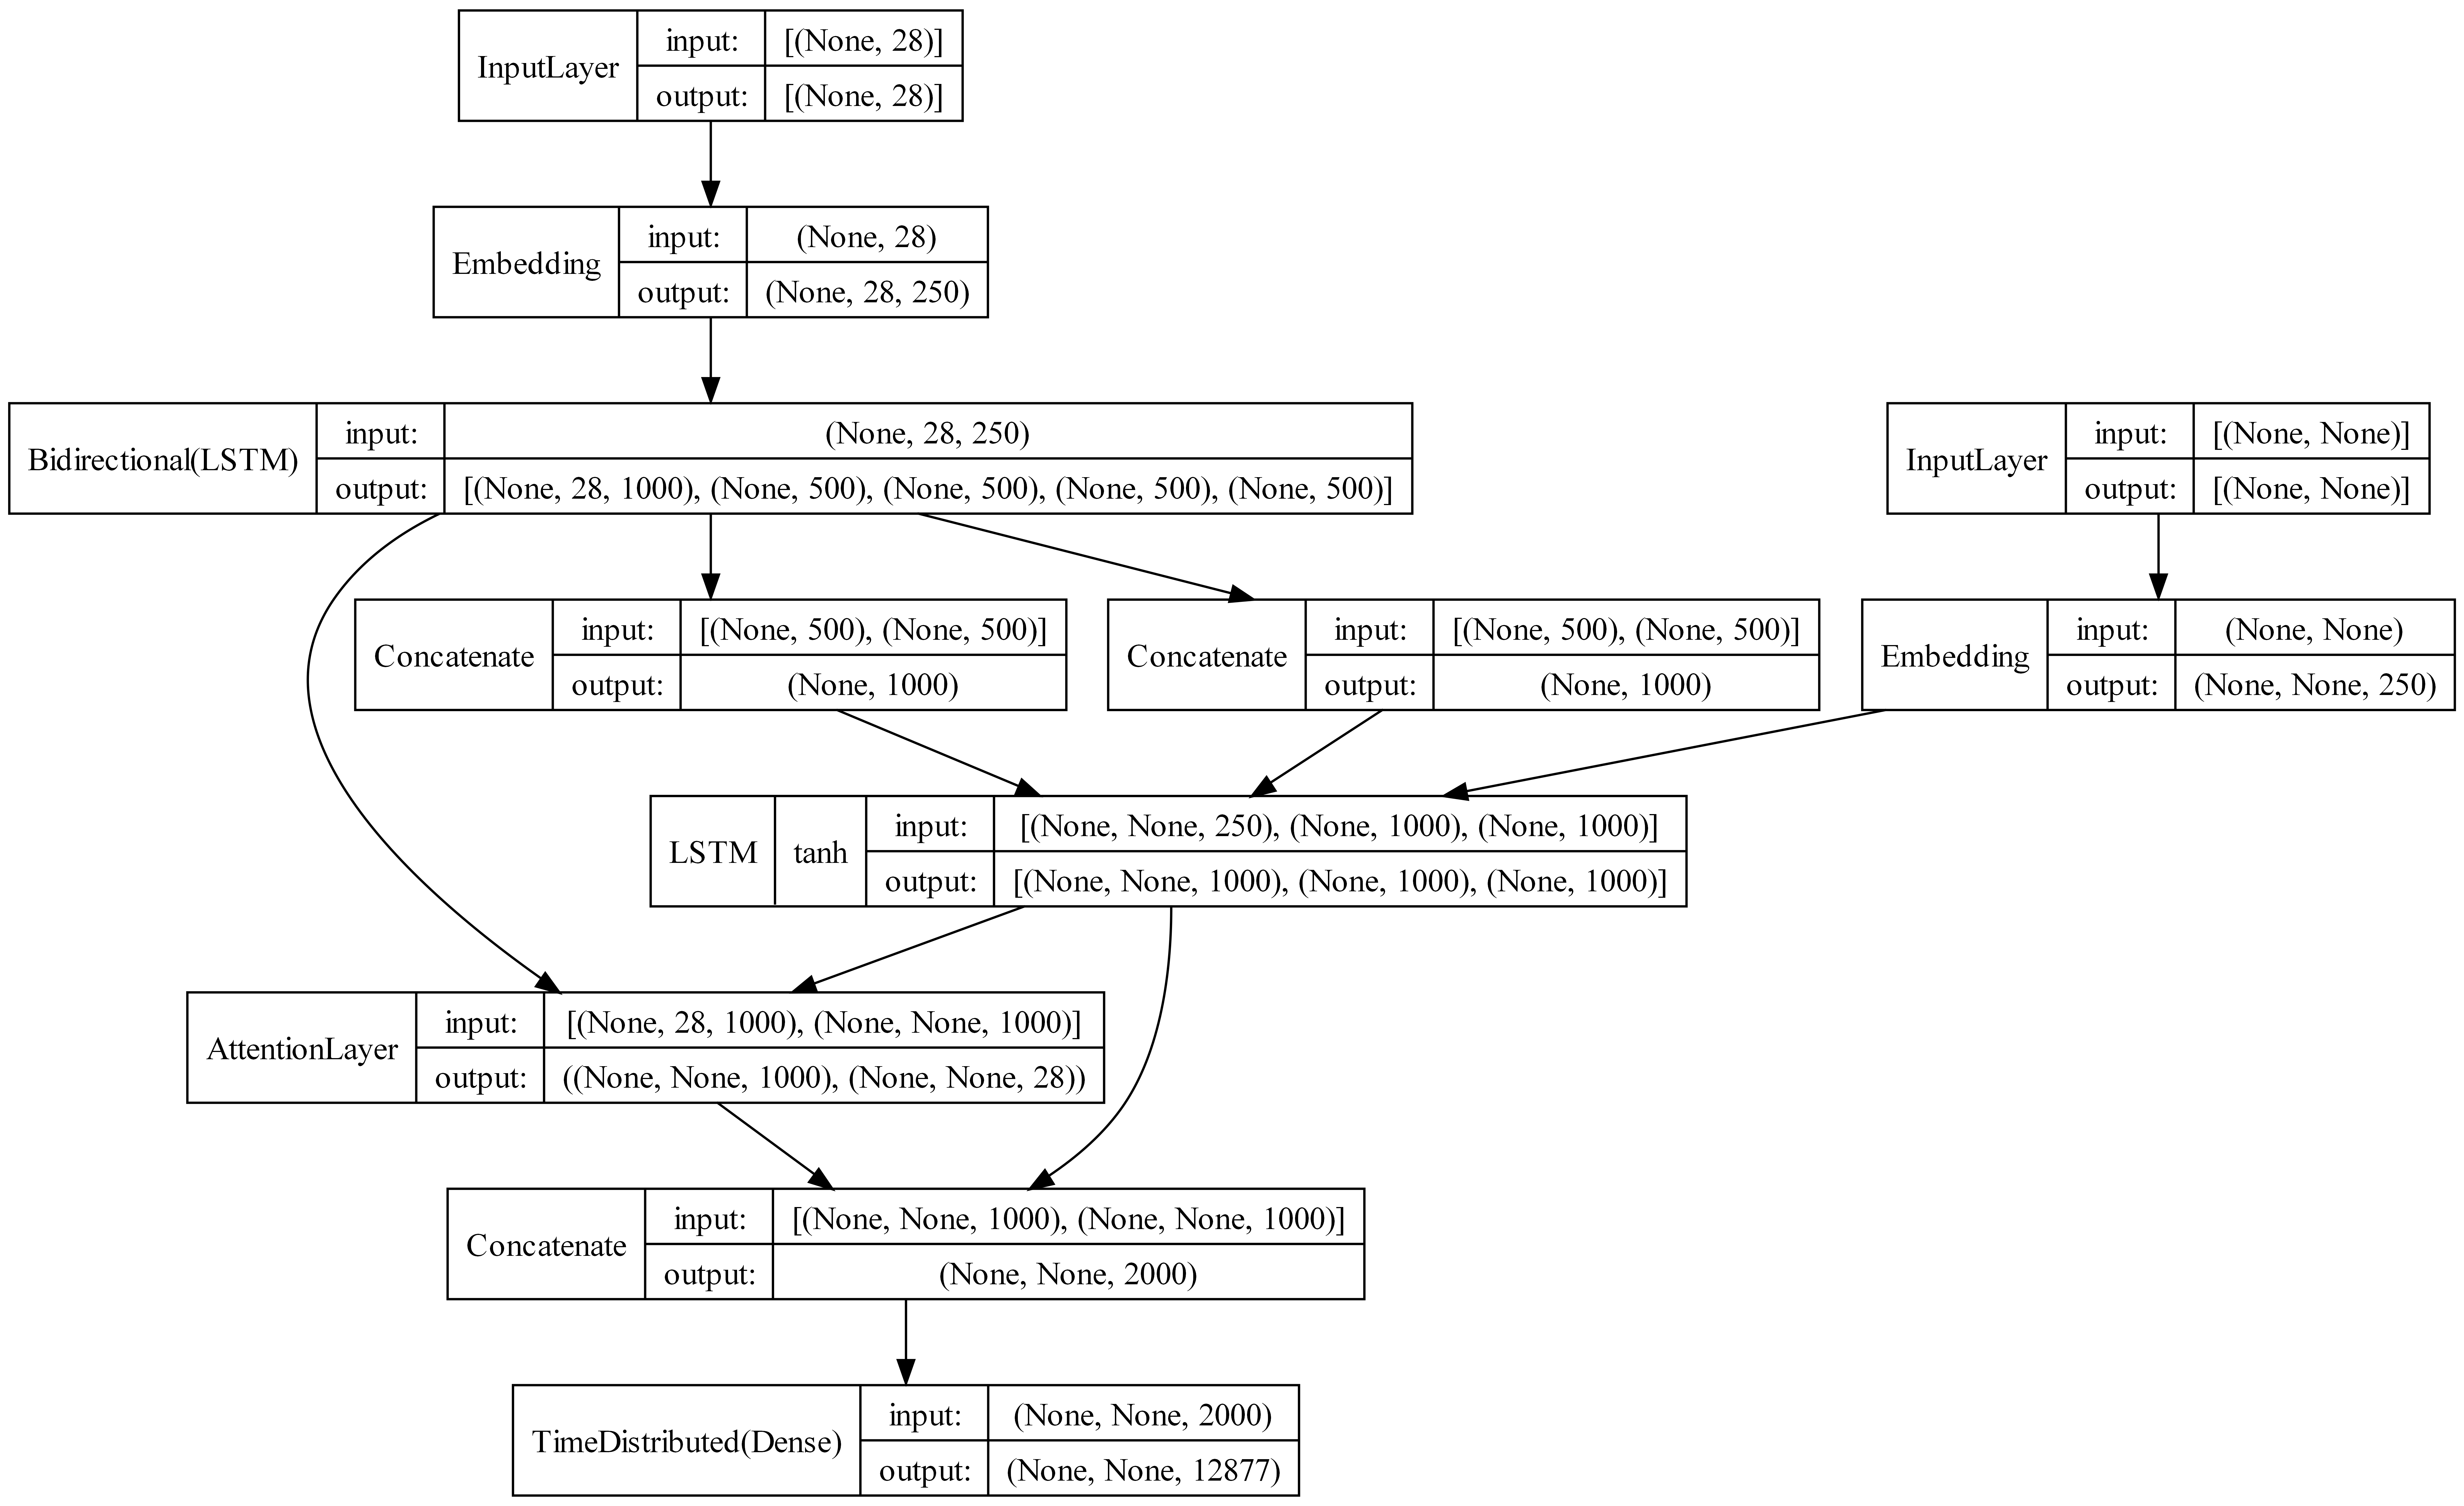

In [22]:
from tensorflow.keras.utils import plot_model

plot_model(
    model,
    #to_file='model.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=False,
    rankdir='TB',
    expand_nested=False,
    dpi=600,
    layer_range=None,
    show_layer_activations=True,
    show_trainable=False
)

In [ ]:
model_batch_size=15
model_epochs = model_batch_size

history = model.fit([x_tr, y_tr[:, :-1]], y_tr.reshape(y_tr.shape[0], y_tr.shape[1], 1)[:, 1:], epochs=model_epochs, callbacks=[es],
                    batch_size=model_batch_size, validation_data=([x_val, y_val[:, :-1]], y_val.reshape(y_val.shape[0], y_val.shape[1], 1)[:, 1:]))

Epoch 1/15
1400/1400 [==============================] - 1317s 937ms/step - loss: 5.9044 - val_loss: 5.0695
Epoch 2/15
1400/1400 [==============================] - 1301s 929ms/step - loss: 4.5882 - val_loss: 4.3989
Epoch 3/15
1400/1400 [==============================] - 1303s 931ms/step - loss: 3.2822 - val_loss: 4.0229
Epoch 4/15
1400/1400 [==============================] - 1309s 935ms/step - loss: 1.9067 - val_loss: 3.9357
Epoch 5/15
1400/1400 [==============================] - 1320s 943ms/step - loss: 0.9123 - val_loss: 4.0399
Epoch 6/15
1400/1400 [==============================] - 1320s 943ms/step - loss: 0.4247 - val_loss: 4.1538
Epoch 7/15
1400/1400 [==============================] - 1320s 943ms/step - loss: 0.2284 - val_loss: 4.3103
Epoch 7: early stopping


Plot the losses

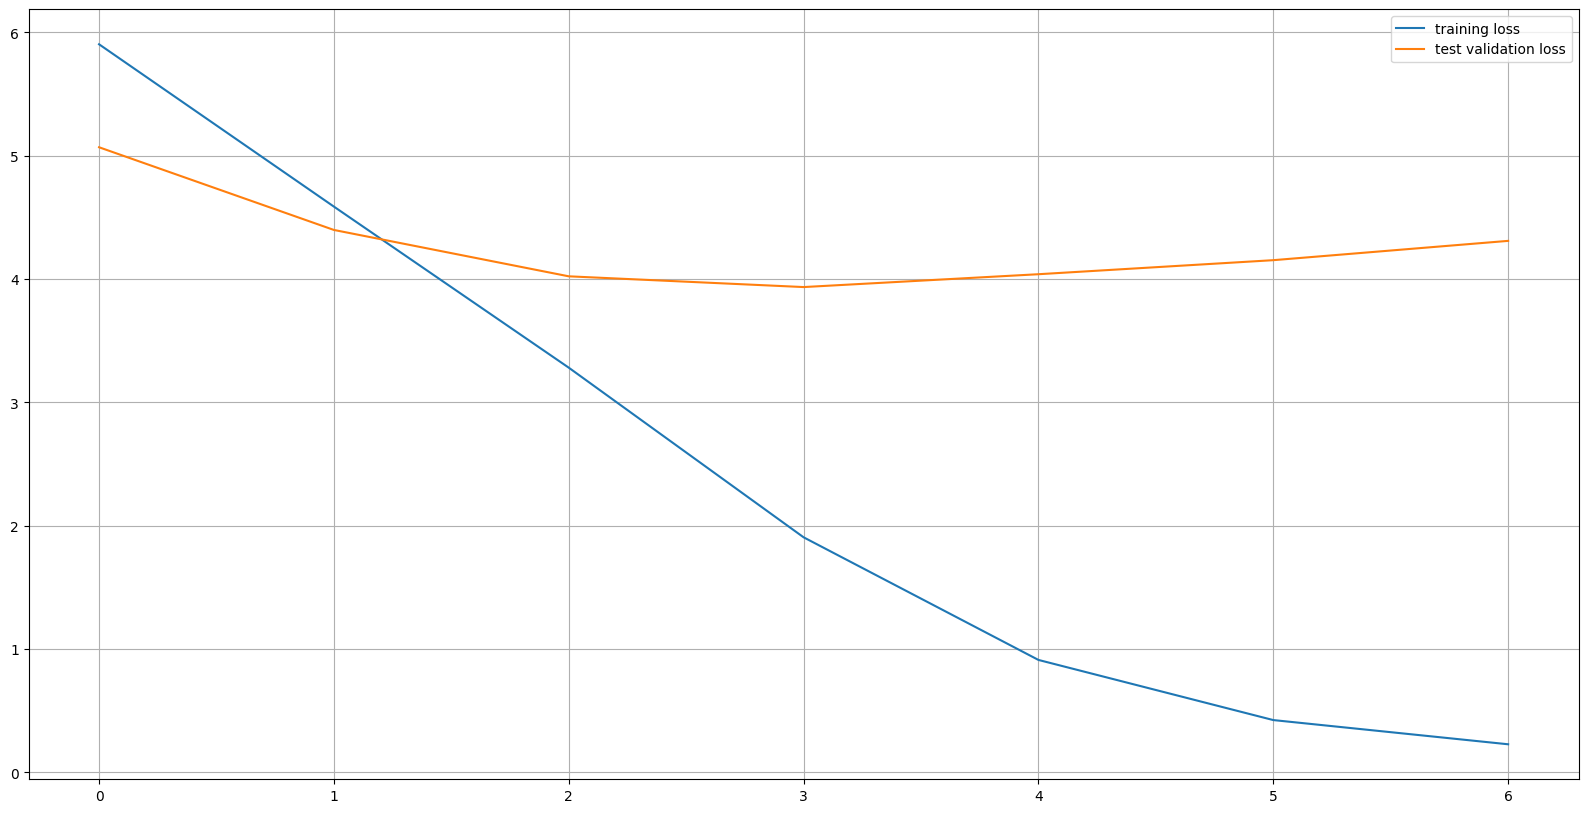

In [ ]:
pyplot.plot(history.history['loss'], label='training loss')
pyplot.plot(history.history['val_loss'], label='test validation loss')
pyplot.legend()
pyplot.grid()
pyplot.show()

In [ ]:
# # encoder inference
# encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])

# # decoder inference
# # Below tensors will hold the states of the previous time step
# decoder_state_input_h = Input(shape=(latent_dim,))
# decoder_state_input_c = Input(shape=(latent_dim,))
# decoder_hidden_state_input = Input(shape=(max_len_text,latent_dim))

# # Get the embeddings of the decoder sequence
# dec_emb2= dec_emb_layer(decoder_inputs)

# # To predict the next word in the sequence, set the initial states to the states from the previous time step
# decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

# #attention inference
# attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
# decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# # A dense softmax layer to generate prob dist. over the target vocabulary
# decoder_outputs2 = decoder_dense(decoder_inf_concat)

# # Final decoder model
# decoder_model = Model(
# [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
# [decoder_outputs2] + [state_h2, state_c2])

from keras.models import Model
from keras.layers import Input

# Encoder inference
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h, state_c])

# Decoder inference
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim*2,))
decoder_state_input_c = Input(shape=(latent_dim*2,))
decoder_hidden_state_input = Input(shape=(max_len_text, latent_dim*2,))  # Update shape because of bidirectionality

# Get the embeddings of the decoder sequence
dec_emb2= dec_emb_layer(decoder_inputs)

# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

# Attention inference
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_inf_concat)

# Final decoder model
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input, decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2]
)


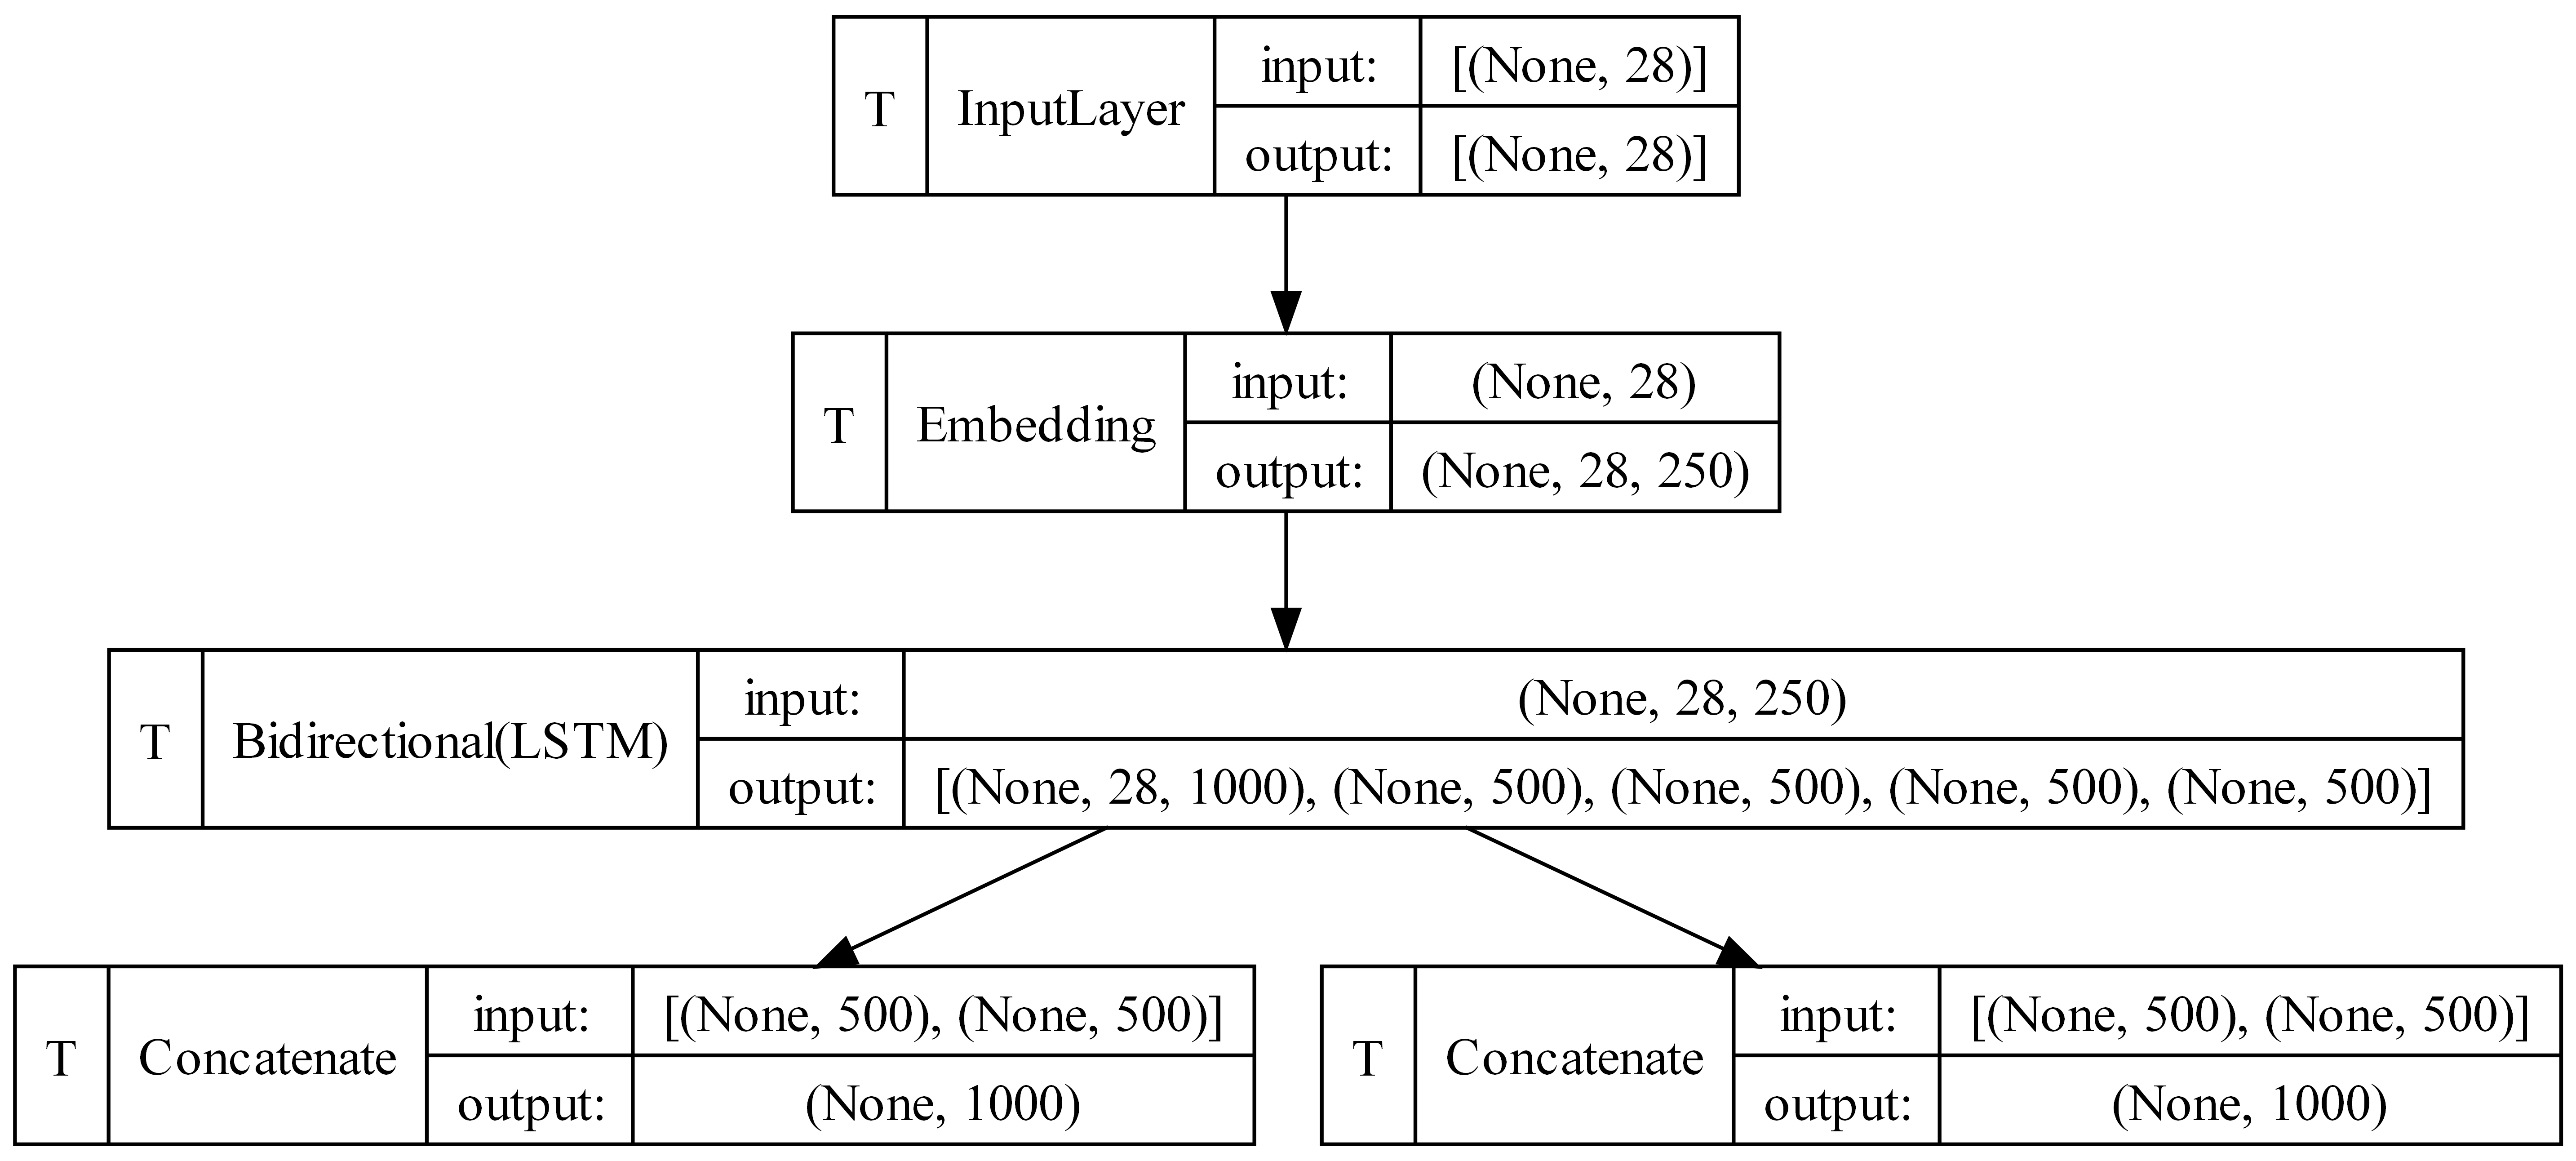

In [ ]:
plot_model(
    encoder_model,
    #to_file='model.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=False,
    rankdir='TB',
    expand_nested=False,
    dpi=600,
    layer_range=None,
    show_layer_activations=True,
    show_trainable=True
)

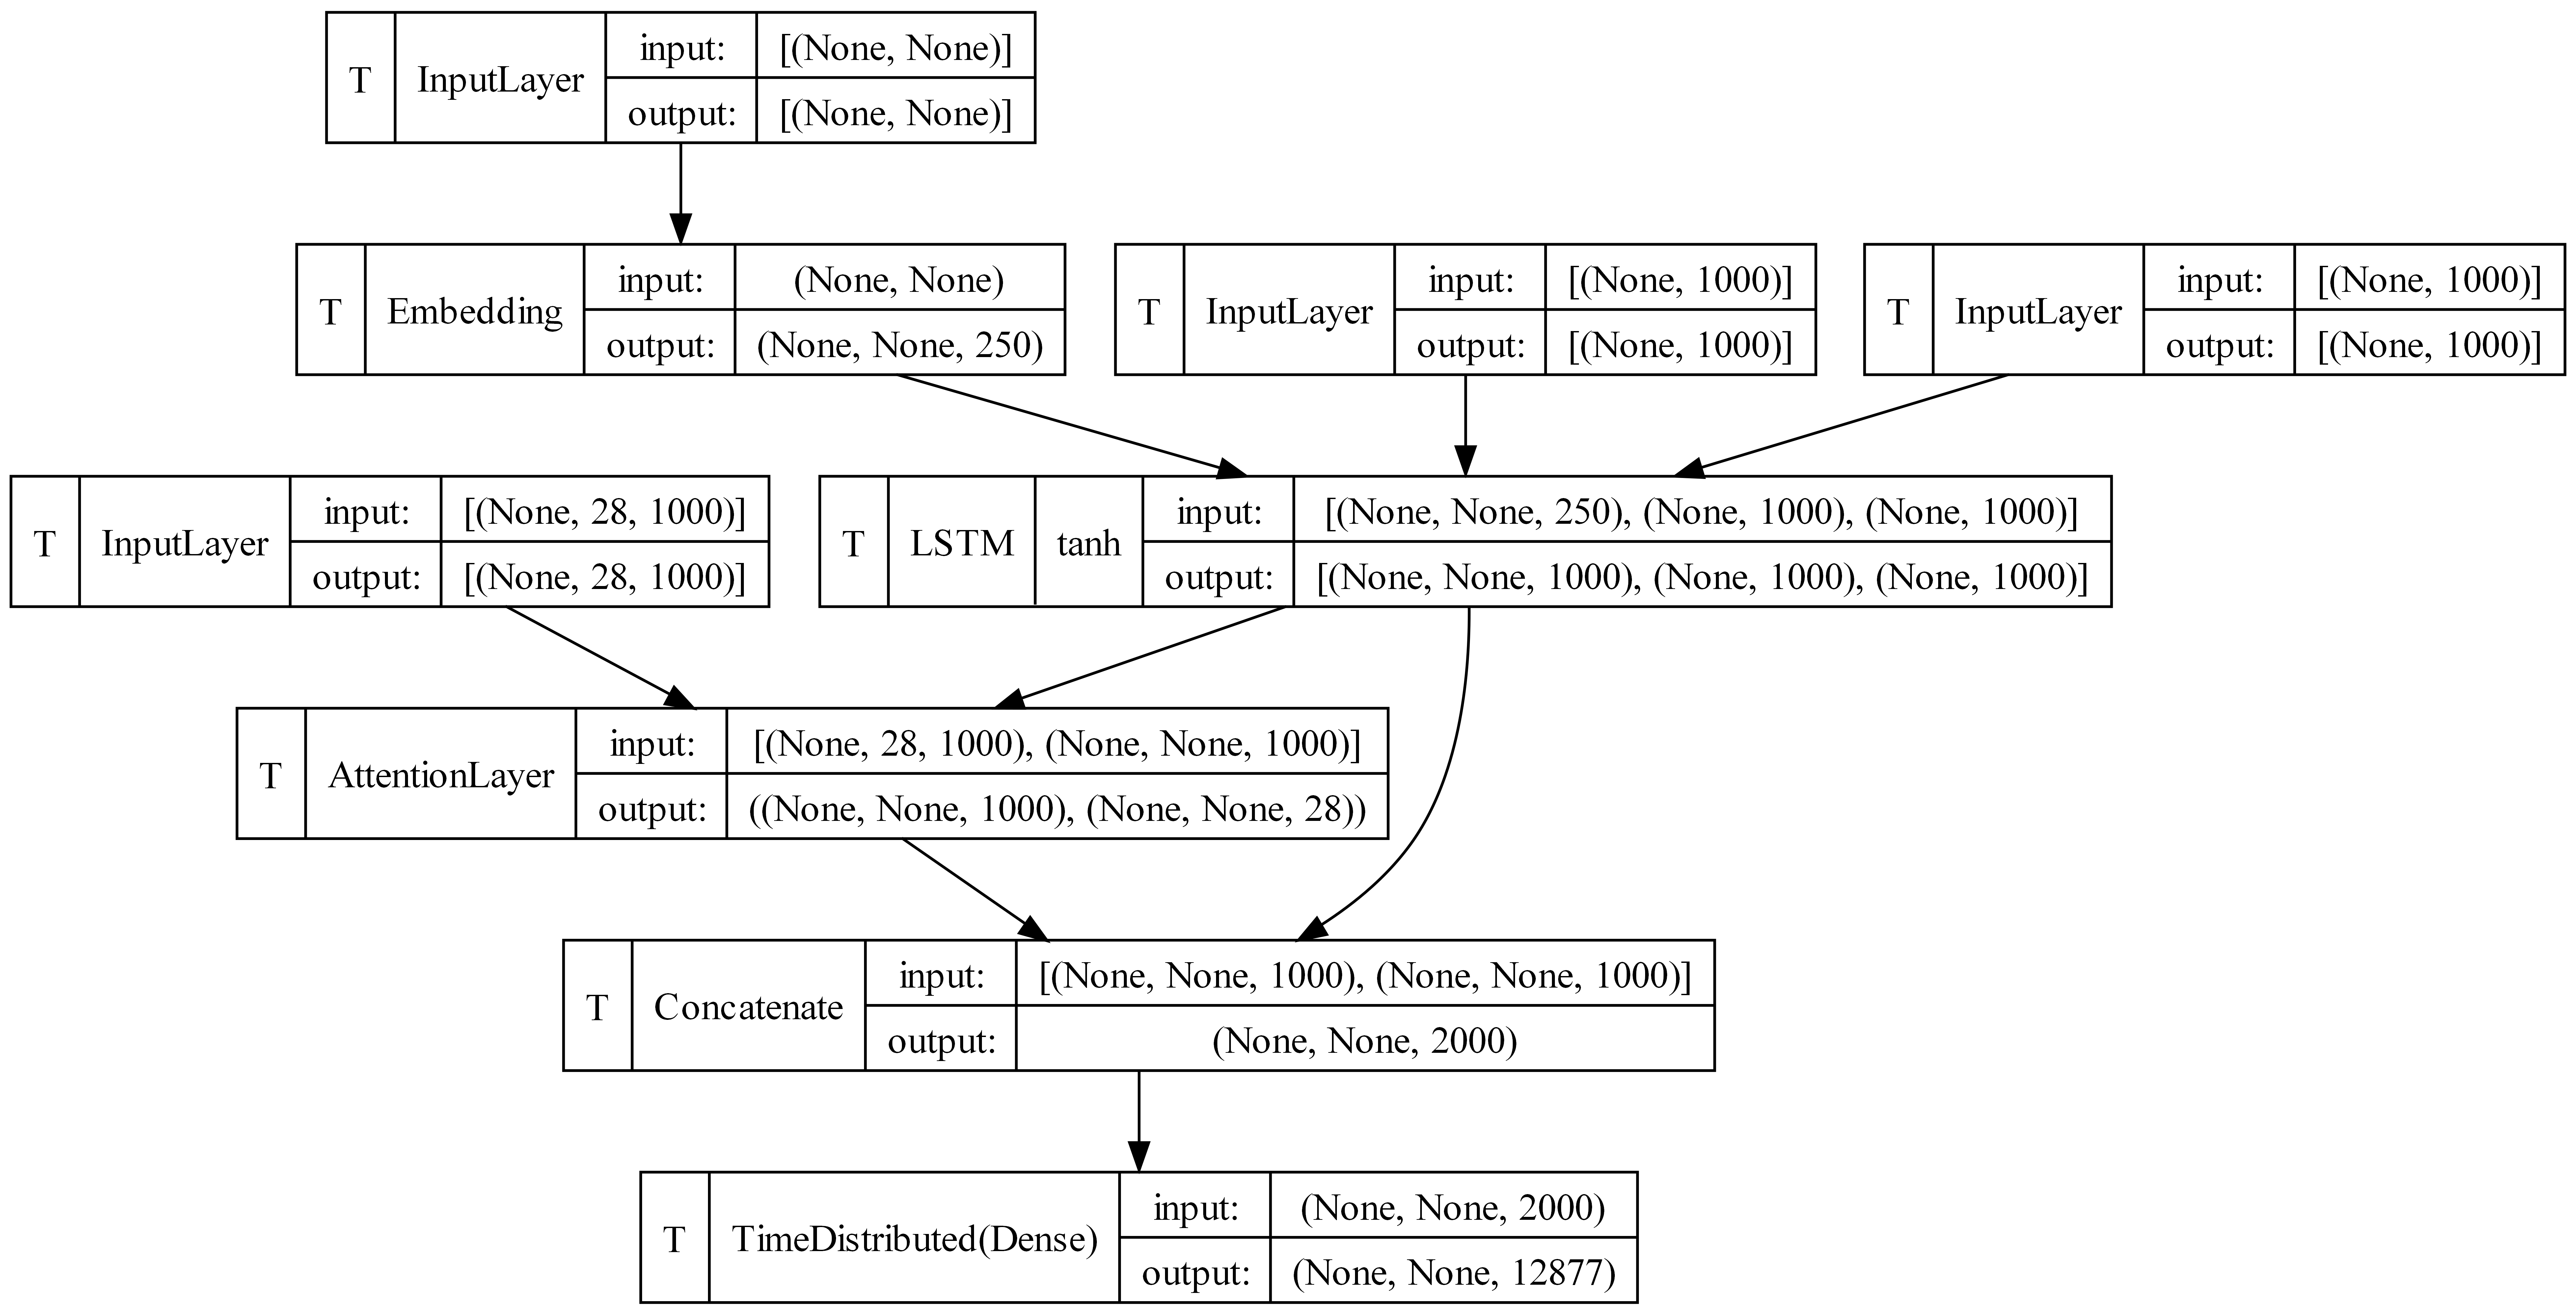

In [ ]:
plot_model(
    decoder_model,
    #to_file='model.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=False,
    rankdir='TB',
    expand_nested=False,
    dpi=600,
    layer_range=None,
    show_layer_activations=True,
    show_trainable=True
)

In [ ]:
import numpy as np
def decode_sequence(input_seq):
    e_out, e_h, e_c = encoder_model.predict(input_seq)
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = target_word_index['start']
    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
        sampled_token_index = np.argmax(output_tokens[0, -1, :]) 
        sampled_token = reverse_target_word_index[sampled_token_index]
        if(sampled_token!='end'):
            decoded_sentence += ' '+sampled_token
        if (sampled_token == 'end'  or len(decoded_sentence.split()) >= (max_len_summary-1)):
            stop_condition = True
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index
        e_h, e_c = h, c
    return decoded_sentence

def seq2summary(input_seq):
    newString=''
    for i in input_seq:
      if((i!=0 and i!=target_word_index['start']) and i!=target_word_index['end']):
        newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
      if(i!=0):
        newString=newString+reverse_source_word_index[i]+' '
    return newString

Write data to file

In [ ]:
import csv

if os.path.exists(file_path+'df_encoder_decoder_output.csv'):
    os.remove(file_path+'df_encoder_decoder_output.csv')

In [ ]:
# Open the CSV file in append mode
with open(file_path + 'df_encoder_decoder_output.csv', 'a', newline='', encoding='utf-8') as f:
    writer = csv.writer(f)
    
    # Write the header
    writer.writerow(['Type', 'Plot', 'Original_summary', 'Predicted_summary'])
    
    for i in range(len(y_tr)):
        try:
            plot = seq2text(x_tr[i])
            osummary = seq2summary(y_tr[i])
            psummary = decode_sequence(x_tr[i].reshape(1, max_len_text))
            writer.writerow(['Training', plot, osummary, psummary])
        except Exception as error:
            print('Type - errored')
            pass

1/1 [==============================] - 0s 25ms/step
Type - errored
1/1 [==============================] - 0s 64ms/step


In [ ]:
# Open the CSV file in append mode
with open(file_path + 'df_encoder_decoder_output.csv', 'a', newline='', encoding='utf-8') as f:
    writer = csv.writer(f)
    
    # Write the header
    writer.writerow(['Type', 'Plot', 'Original_summary', 'Predicted_summary'])
    
    for i in range(len(y_val)):
        try:
            plot = seq2text(x_val[i])
            osummary = seq2summary(y_val[i])
            psummary = decode_sequence(x_val[i].reshape(1, max_len_text))
            writer.writerow(['Testing', plot, osummary, psummary])
        except Exception as error:
            print('Type - errored')
            pass


1/1 [==============================] - 0s 24ms/step


In [25]:
df = pd.read_csv(file_path+'df_encoder_decoder_output.csv')

In [26]:
df

Type                                               Plot  \
0      Training  released 1992 follows south korean infantry un...   
1      Training  russell ralph richardson story follows young i...   
2      Training  movie two working class brothers newcastle upo...   
3      Training  directed sanjay leela bhansali starring rani m...   
4      Training  better times 1919 american silent comedy drama...   
...         ...                                                ...   
27112  Training  directed wong jing follows story gigolo joey h...   
27113  Training  film set world war follows german fighter ace ...   
27114  Training  2014 indian kannada action drama film directed...   
27115  Training  1933 movie parole girl young woman released pr...   
27116  Training  slicked pup 1951 western comedy film man inher...   

                                        Original_summary  \
0          korean war drama guilt responsibility memory    
1              doctor improves miner life personal cost    
2      newcastle difficult circumstances football imp...   
3                     emotional journey deaf blind girl    
4           silent comedy drama woman chooses happiness    
...                                                  ...   
27112                   comedy joey triad wedding macau    
27113   strives medal disregards rules superiors advice    
27114                  surya avenges father loves durga    
27115           boyfriend still prison decide stay move    
27116             outlaws threaten ranch wit charm used    

                                Predicted_summary  
0                     british drama film 1971 war  
1             honey improves improves life around  
2       two brothers search zamindars hilariously  
3                     indian drama film partition  
4               woman chooses happiness happiness  
...                                           ...  
27112             comedy joey triad wedding macau  
27113                 biopic john wayne leads war  
27114             brothers fight justice win love  
27115            young man gambles european women  
27116                    johnny saves ranch ranch  

[27117 rows x 4 columns]

BLEU scoring

In [ ]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

# Function to calculate BLEU score for a single row
def calculate_bleu(row):
    try:
        reference_tokens = str(row['Original_summary']).split()
        generated_tokens = str(row['Predicted_summary']).split()
        smoothing = SmoothingFunction().method1  # You can choose a different method if you prefer
        return sentence_bleu([reference_tokens], generated_tokens, smoothing_function=smoothing)
    except Exception:
        return 0

# Calculate BLEU scores
df['bleu_score'] = df.apply(calculate_bleu, axis=1)

# Print the average BLEU score
average_bleu_score = df['bleu_score'].mean()
print("Average BLEU score:", average_bleu_score)


Average BLEU score: 0.12783402849202055


WER scoring

In [ ]:
import nltk

# Function to calculate WER for a single row
def calculate_wer(row):
    try:
        reference_tokens = str(row['Original_summary']).split()
        generated_tokens = str(row['Predicted_summary']).split()
        distance = nltk.edit_distance(reference_tokens, generated_tokens)
        if len(reference_tokens) > 0:
            return distance / len(reference_tokens)
        else:
            return 0
    except Exception:
        return 0

# Calculate WER scores
df['wer_score'] = df.apply(calculate_wer, axis=1)

# Print the average WER score
average_wer_score = df['wer_score'].mean()
print("Average WER score:", average_wer_score)


Average WER score: 0.8121043379921574


ROGUE scoring

In [ ]:
from rouge_score import rouge_scorer

# Initialize RougeScorer
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

# Initialize score accumulators
rouge1_precision, rouge1_recall, rouge1_fmeasure = [], [], []
rouge2_precision, rouge2_recall, rouge2_fmeasure = [], [], []
rougeL_precision, rougeL_recall, rougeL_fmeasure = [], [], []

# Calculate ROUGE scores
for i in range(len(df)):
    reference = str(df['Original_summary'][i])
    generated = str(df['Predicted_summary'][i])
    # Calculate ROUGE scores
    scores = scorer.score(reference, generated)
    
    rouge1_precision.append(scores['rouge1'].precision)
    rouge1_recall.append(scores['rouge1'].recall)
    rouge1_fmeasure.append(scores['rouge1'].fmeasure)
    
    rouge2_precision.append(scores['rouge2'].precision)
    rouge2_recall.append(scores['rouge2'].recall)
    rouge2_fmeasure.append(scores['rouge2'].fmeasure)
    
    rougeL_precision.append(scores['rougeL'].precision)
    rougeL_recall.append(scores['rougeL'].recall)
    rougeL_fmeasure.append(scores['rougeL'].fmeasure)

# Calculate average scores
def calculate_average(scores):
    return sum(scores) / len(scores) if len(scores) > 0 else 0

print("Average ROUGE-1 precision:", calculate_average(rouge1_precision))
print("Average ROUGE-1 recall:", calculate_average(rouge1_recall))
print("Average ROUGE-1 f-measure:", calculate_average(rouge1_fmeasure))

print("Average ROUGE-2 precision:", calculate_average(rouge2_precision))
print("Average ROUGE-2 recall:", calculate_average(rouge2_recall))
print("Average ROUGE-2 f-measure:", calculate_average(rouge2_fmeasure))

print("Average ROUGE-L precision:", calculate_average(rougeL_precision))
print("Average ROUGE-L recall:", calculate_average(rougeL_recall))
print("Average ROUGE-L f-measure:", calculate_average(rougeL_fmeasure))


Average ROUGE-1 precision: 0.30612285036443937
Average ROUGE-1 recall: 0.2742617089613519
Average ROUGE-1 f-measure: 0.28748736481889914
Average ROUGE-2 precision: 0.149956361937778
Average ROUGE-2 recall: 0.13906405575837655
Average ROUGE-2 f-measure: 0.14337064106949723
Average ROUGE-L precision: 0.2953018401740259
Average ROUGE-L recall: 0.2652395176457664
Average ROUGE-L f-measure: 0.27770761606359745


METEOR score

In [ ]:
from nltk.translate import meteor_score

# Function to calculate METEOR score for a single row
def calculate_meteor(row):
    try:
        reference = str(row['Original_summary']).lower().split()
        generated = str(row['Predicted_summary']).lower().split()
        return meteor_score.single_meteor_score(reference, generated)
    except Exception as e:
        print(f"Error: {e}")
        return 0

# Calculate METEOR scores
df['meteor_score'] = df.apply(calculate_meteor, axis=1)

# Print the average METEOR score
average_meteor_score = df['meteor_score'].mean()
print("Average METEOR score:", average_meteor_score)


Average METEOR score: 0.21730916614721613


Perplexity

In [ ]:
from nltk.lm import MLE
from nltk.lm.preprocessing import padded_everygram_pipeline

def calculate_perplexity(test_data, n=10):
    # Tokenize test data
    tokenized_test_data = [list(map(str.lower, word_tokenize(sent))) for sent in test_data]

    # Create training data and vocabulary
    train_data, vocabulary = padded_everygram_pipeline(n, tokenized_test_data)

    # Train the language model
    model = MLE(n)
    model.fit(train_data, vocabulary)

    # Calculate perplexity
    perplexity = model.perplexity(tokenized_test_data)

    return perplexity

test_data = []
for i in range(len(df)):
    generated = str(df['Predicted_summary'][i])
    test_data.append(generated)

perplexity = calculate_perplexity(test_data)
print(f"Perplexity: {perplexity:.4f}")
print(f"Probability of correct prediction: {1/perplexity:.4f}")

Perplexity: 1.7768
Probability of correct prediction: 0.5628
